# 1 Pré-processamento


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE # Biblioteca para balancear os dados utilizando over_sampling


## 1.1 - Importando os dados

In [ ]:
dados = pd.read_csv("https://raw.githubusercontent.com/Lpedro22/Machine_Learning/main/ml_costumer_churn/Customer-Churn%20-%20Customer-Churn.csv")
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [ ]:
dados.shape

(7043, 18)

In [ ]:
# verificando se alguma coluna possui dados em branco
np.sum(dados.isnull())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Maior65Anos                0
Conjuge                    0
Dependentes                0
MesesDeContrato            0
TelefoneFixo               0
VariasLinhasTelefonicas    0
ServicoDeInternet          0
SegurancaOnline            0
BackupOnline               0
SeguroNoDispositivo        0
SuporteTecnico             0
TVaCabo                    0
StreamingDeFilmes          0
TipoDeContrato             0
PagamentoOnline            0
FormaDePagamento           0
ContaMensal                0
Churn                      0
dtype: int64

## 1.2 - Diferentes Variáveis

In [ ]:
for col in dados.columns:
  print(col, dados[col].unique())

Maior65Anos [0 1]
Conjuge ['Sim' 'Nao']
Dependentes ['Nao' 'Sim']
MesesDeContrato [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
TelefoneFixo ['Nao' 'Sim']
VariasLinhasTelefonicas ['SemServicoTelefonico' 'Nao' 'Sim']
ServicoDeInternet ['DSL' 'FibraOptica' 'Nao']
SegurancaOnline ['Nao' 'Sim' 'SemServicoDeInternet']
BackupOnline ['Sim' 'Nao' 'SemServicoDeInternet']
SeguroNoDispositivo ['Nao' 'Sim' 'SemServicoDeInternet']
SuporteTecnico ['Nao' 'Sim' 'SemServicoDeInternet']
TVaCabo ['Nao' 'Sim' 'SemServicoDeInternet']
StreamingDeFilmes ['Nao' 'Sim' 'SemServicoDeInternet']
TipoDeContrato ['Mensalmente' 'UmAno' 'DoisAnos']
PagamentoOnline ['Sim' 'Nao']
FormaDePagamento ['ChequeDigital' 'ChequePapel' 'DebitoEmConta' 'CartaoDeCredito']
ContaMensal [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn ['Nao' 'Sim']


In [ ]:
# Lista das colunas a serem mapeadas
colunas_para_mapeamento = [
    'Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'
]

# Dicionário de mapeamento
troca = {
    'Sim': 1,
    'Nao': 0,
}

# Aplicando o mapeamento a todas as colunas relevantes
dadosbinarios = dados[colunas_para_mapeamento].applymap(troca.get)

# Exibindo as primeiras linhas do DataFrame para verificar
dadosbinarios.head()


<ipython-input-29-bde9aa8bb21a>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dadosbinarios = dados[colunas_para_mapeamento].applymap(troca.get)


,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [ ]:
# Tratando colunas de classes multiplas
# Transformação pelo get_dummies

dados_sem_colunas_bin = dados.drop(columns=colunas_para_mapeamento, axis = 1)

# Convetendo colunas de classes de classes multiplas
dummie_dados = pd.get_dummies(dados_sem_colunas_bin, dtype = int)
dummie_dados.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
dados_final = pd.concat([dummie_dados, dadosbinarios], axis = 1)
dados_final.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
1,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1
3,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1


## 1.3 - Definição Formal

Informações para classificação:

$X$ = inputs (dados de entrada)

$y$ = outputs (dados de saída)

In [ ]:
#DICA
pd.set_option('display.max_columns', 39)

In [ ]:
dados_final.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
1,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1
3,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1



$y_i$ = $f(x_i)$

In [ ]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [ ]:
#ymaria = ?

Novos pares de informações = ($Xmaria$, $ymaria$)

## 1.4 Balanceamento dos dados

In [ ]:
dados_final['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

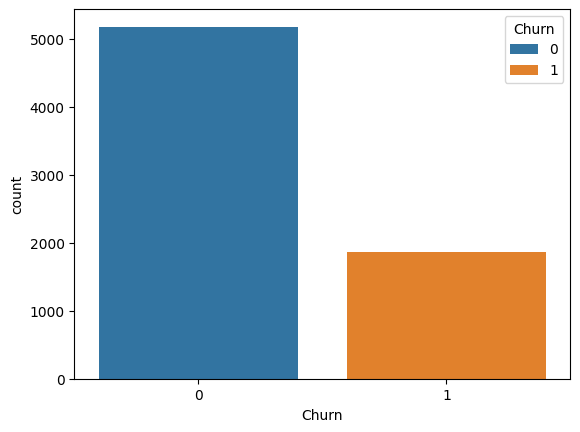

In [ ]:
# variável target está desbalanceada
%matplotlib inline
ax = sns.countplot(x='Churn', hue= 'Churn', data=dados_final)

https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b

In [ ]:
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [ ]:
SEED = 123
smt = SMOTE(random_state=SEED)
X_smt, y_smt = smt.fit_resample(X, y)

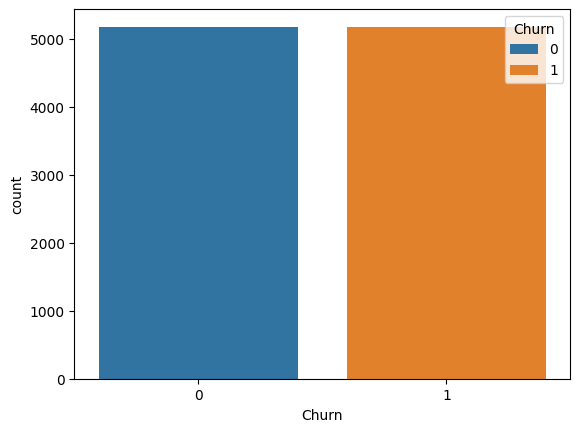

In [ ]:
dados_final_smt = pd.concat([X_smt, y_smt], axis = 1)
ax = sns.countplot(x='Churn', hue= 'Churn', data=dados_final_smt)

# 2 Support Vector Classifier (SVC)

In [ ]:
# treino e teste
norm = StandardScaler()
X_normalizado = norm.fit_transform(X_smt)

SEED = 123
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y_smt, test_size = 0.25, random_state = SEED, stratify = y_smt)

# criar o modelo
svc = SVC(gamma='auto', random_state=SEED)

# treinar o modelo
svc.fit(X_treino, y_treino)

# testar o modelo
predito_svc = svc.predict(X_teste)

# usar o modelo
Xmaria_normalizado = norm.transform(Xmaria)
ymaria = svc.predict(Xmaria_normalizado)
print("Ymaria:", ymaria[0])

Ymaria: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



# 3 Modelo K-nearest neighbors (KNN) - método baseado na proximidade


## 3.1 - KNN por trás dos panos

Distância Euclidiana:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

In [ ]:
# treino e teste
norm = StandardScaler()
X_normalizado = norm.fit_transform(X_smt)

#SEED = 123
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y_smt, test_size = 0.25, random_state = SEED, stratify = y_smt)

# criar o modelo
knn = KNeighborsClassifier(metric = 'euclidean')

# treinar o modelo
knn.fit(X_treino, y_treino)

# testar o modelo
predito_knn = knn.predict(X_teste)

# usar o modelo
Xmaria_normalizado = norm.transform(Xmaria)
ymaria = knn.predict(Xmaria_normalizado)
print("Ymaria:", ymaria[0])

Ymaria: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 4 Método probabilístico

## 4.1 - Teorema de Naive Bayes



$P(y|X)$ = ${P(X|y) + P(y) \over P(X)}$

In [ ]:
# # treino e teste
# norm = StandardScaler()
# X_normalizado = norm.fit_transform(X_smt)

#SEED = 123
X_treino, X_teste, y_treino, y_teste = train_test_split(X_smt, y_smt, test_size = 0.25, random_state = SEED, stratify = y_smt)

# criar o modelo
mnb = MultinomialNB()

# treinar o modelo
mnb.fit(X_treino, y_treino)

# testar o modelo
predito_mnb = mnb.predict(X_teste)

# usar o modelo
# Xmaria_normalizado = norm.transform(Xmaria)
# ymaria = mnb.predict(Xmaria_normalizado)
ymaria = mnb.predict(Xmaria_normalizado)
print("Ymaria:", ymaria[0])

Ymaria: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


## 4.2 - Modelo Bernoulli Naive Bayes



$P(xi|y)$ = P(i|y)xi + (1 - P(i|y))(1 - xi)

# 5 Método Simbólico

## 5.1 - Por trás da árvore de decisão

Critério de divisão dos nós

Para conseguir identificar qual o melhor momento em que um nó deve ser dividido em dois ou mais subnós, o algoritmo da árvore de decisão considera alguns critérios. Os dois principais critérios de divisão usados nas árvores de decisão são:

**Índice Gini**

Este índice informa o grau de heterogeneidade dos dados. O objetivo dele é medir a frequência de um elemento aleatório de um nó ser rotulado de maneira incorreta. Em outros termos, esse índice é capaz de medir a impureza de um nó e ele é determinado por meio do seguinte cálculo:


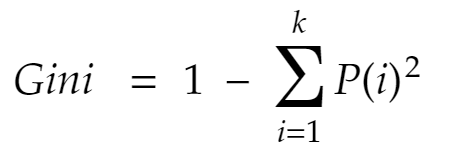

Onde:

p(i) representa a frequência relativa das classes em cada um dos nós;
k é o número de classes. Se o índice Gini for igual a 0, isso indica que o nó é puro. No entanto, se o valor dele se aproxima mais do valor 1, o nó é impuro.

**Entropia***

A ideia básica da entropia é medir a desordem dos dados de um nó por meio da variável classificadora. Assim como o índice de Gini, ela é utilizada para caracterizar a impureza dos dados e pode ser calculada por meio da seguinte fórmula:

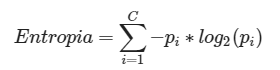


Onde:

pi representa a proporção de dados no conjunto de dados (S), pertencentes à classe específica i; c é o número de classes.


In [ ]:
# # treino e teste
# norm = StandardScaler()
# X_normalizado = norm.fit_transform(X_smt)

#SEED = 123
X_treino, X_teste, y_treino, y_teste = train_test_split(X_smt, y_smt, test_size = 0.25, random_state = SEED, stratify = y_smt)

# criar o modelo
dtc = DecisionTreeClassifier(max_depth=5)

# treinar o modelo
dtc.fit(X_treino, y_treino)

# testar o modelo
predito_dtc = dtc.predict(X_teste)

# usar o modelo
# Xmaria_normalizado = norm.transform(Xmaria)
# ymaria = dtc.predict(Xmaria_normalizado)
ymaria = dtc.predict(Xmaria_normalizado)
print("Ymaria:", ymaria[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Ymaria: 1


# 6 Validação dos modelos

## 6.1 - Matriz de confusão



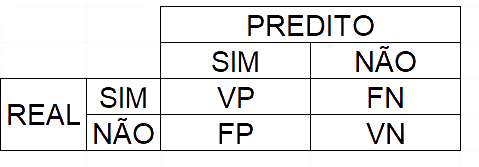

In [ ]:
# confusion matrix

mc_svc = confusion_matrix(y_teste, predito_svc)
mc_knn = confusion_matrix(y_teste, predito_knn)
mc_mnb = confusion_matrix(y_teste, predito_mnb)
mc_dtc = confusion_matrix(y_teste, predito_dtc)
print(mc_svc)
print(mc_knn)
print(mc_mnb)
print(mc_dtc)



[[1112  182]
 [ 238 1055]]
[[1039  255]
 [ 189 1104]]
[[945 349]
 [314 979]]
[[1049  245]
 [ 258 1035]]


In [ ]:
def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]
    labels = [f"{v1}" for v1 in labels]
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    ax = plt.subplot()
    sns.set(font_scale=1.1)
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias,yticklabels=categorias)

    label_font = {'size':'12'}
    ax.set_xlabel('Valores preditos', fontdict=label_font);
    ax.set_ylabel('Valores verdadeiros', fontdict=label_font);

    ax.tick_params(axis='both', which='major', labelsize=10)


categorias = ["0", "1"]
labels = ['Verdadeiro Negativo','Falso Positivo',
          'Falso Negativo','Verdadeiro Positivo']



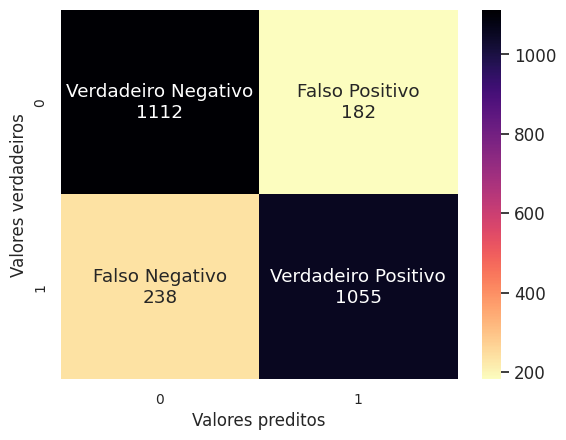

In [ ]:
# Chamando a função
gerando_matriz(mc_svc, labels, categorias, cmap="magma_r")


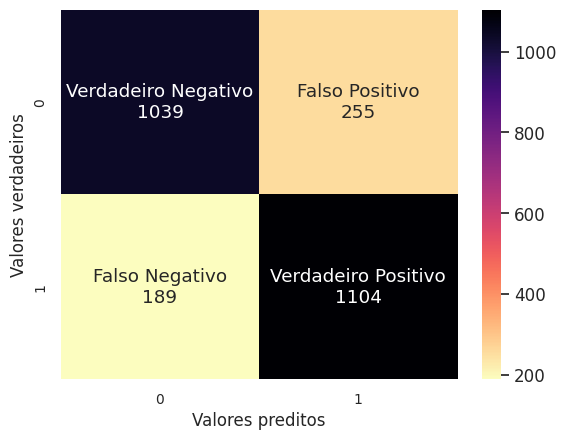

In [ ]:
gerando_matriz(mc_knn, labels, categorias, cmap="magma_r")


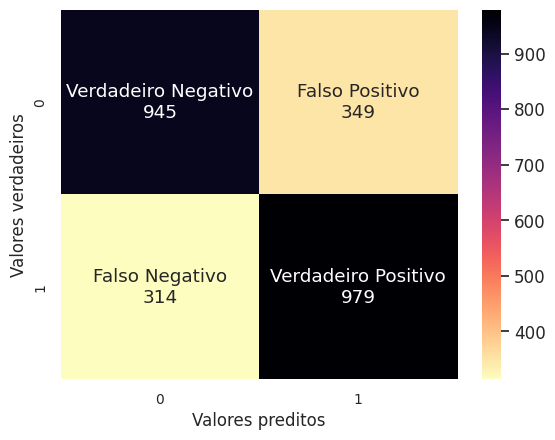

In [ ]:
gerando_matriz(mc_mnb, labels, categorias, cmap="magma_r")


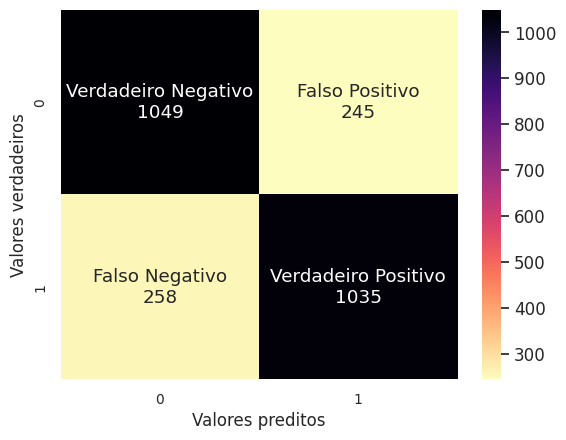

In [ ]:
gerando_matriz(mc_dtc, labels, categorias, cmap="magma_r")

## 6.2 - Acurácia
A partir do calculo da matriz de confusão conseguimos inferir outras métricas, como por exemplo a acurária.




$ACC$ = ${TP + TN \over TP + FP + TN + FN}$

In [ ]:
print(accuracy_score(y_teste, predito_svc))
print(accuracy_score(y_teste, predito_knn))
print(accuracy_score(y_teste, predito_mnb))
print(accuracy_score(y_teste, predito_dtc))

0.8376497873985311
0.8283726323927328
0.7437185929648241
0.8055662930034789


## 6.3 - Precisão

Outra métrica importante é a precisão, que calcula quantos foram classificados corretamento como positivos ($TP$).

$PS$ = ${TP \over TP + FP}$

In [ ]:
print(precision_score(y_teste, predito_svc))
print(precision_score(y_teste, predito_knn))
print(precision_score(y_teste, predito_mnb))
print(precision_score(y_teste, predito_dtc))

0.8528698464025869
0.8123620309050773
0.7371987951807228
0.80859375


## 6.4 - Recall

Outra métrica importante é a Recall ou revocação ou ainda sensibilidade, que calcula o quão bom o modelo está para classificar corretamente um resultado positivo ($TP$).

$RC$ = ${TP \over TP + FN}$

In [ ]:
print(recall_score(y_teste, predito_svc))
print(recall_score(y_teste, predito_knn))
print(recall_score(y_teste, predito_mnb))
print(recall_score(y_teste, predito_dtc))

0.8159319412219644
0.8538283062645011
0.757153905645785
0.8004640371229699


## 6.5 - Escolhendo o melhor modelo


O melhor modelo escolhido foi o SVC